#  Sleep, Productivity, and Cognitive Performance: A Data Science Investigation: Spring 2025 Data Science Project

Group Members: Sai Naraharisetti, Sanjana, Manasvi Sriranga, Ezekiel Franklin, Shashank Arava

Contributions:

Sai
Sections: A, B, C, G

Sai focused on cleaning and preprocessing the dataset to ensure it was suitable for analysis. She also curated the data wrote the summary statistics ans part of the conclusion. In addition, she and worked on compiling and formatting the final tutorial report.

Sanjana
Sections: B, C, F, G

Sanjana  proposed the original data set to use and helped to outline the problem statement. She also conducted exploratory data analysis and contributed significantly to the visualizations and interpretation of results. She also helped in formatting the final report and double checking work.

Manasvi
Sections: B, C, H

Manasvi assisted in dataset curation and handled missing data issues. Additionally, she researched background literature and similar projects to help guide the direction of the analysis. She also helped in the ML Algorithm Design/Development.

Ezekiel Franklin
Sections: D, E, F

Ezekiel helped design the machine learning pipeline and evaluate performance across different models. He contributed to the final accuracy/error analysis and collaborated on the conclusion section.

Shashank Arava
Sections: A, G, H

Shashank worked with Sai on refining the project scope and objectives. He also supported writing and editing the final report, and managed the timeline and coordination among team members.


##  Introduction
Sleep plays a crucial role in our mood, productivity, and cognitive performance, yet it’s often overlooked in our daily routines. In this project, we analyze two datasets to explore how sleep habits—such as duration and quality—affect productivity, emotional well-being, and mental performance. We chose this topic as it had a special interest to us being college students. Sleep is incredibly important and many students may not be getting enough sleep which could potentially effect thier productivity.

We aim to answer:

1. Is there a link between sleep duration and productivity?

2. Does better sleep quality lead to improved mood?

3. How does sleep deprivation impact cognitive performance?

Understanding these relationships can help highlight the importance of sleep for maintaining mental health and daily effectiveness. We use 2 datasets from Kaggle and aim to find meaningful patterns and trends between sleep duration and quality.

##  Research Questions
1. **Is there a statistically significant relationship between sleep duration and productivity?**
2. **Do individuals with higher sleep quality report better mood?**
3. **How does sleep deprivation affect cognitive performance?**

By answering these questions, we hope to highlight the importance of sleep in maintaining mental health and maximizing daily performance.


##  Importing Libraries

Sources for the libaries that we import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##  Data Importing

We are using two datasets from Kaggle that focus on sleep, productivity, and cognitive performance. These datasets are uploaded to our GitHub repository and loaded directly from their raw URLs.

1. **Sleep Cycle and Productivity Dataset**  
   - Source: [Kaggle](https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity)
   - Contains self-reported data on sleep duration, quality, mood, and productivity levels.

2. **Sleep Deprivation and Cognitive Performance Dataset**  
   - Source: [Kaggle](https://www.kaggle.com/datasets/sacramentotechnology/sleep-deprivation-and-cognitive-performance)
   - Contains cognitive test results from participants under various levels of sleep deprivation.

We import both datasets using `pandas` and preview the first few rows to understand their structure.


In [2]:
# Load datasets from GitHub
sleep_df = pd.read_csv("https://raw.githubusercontent.com/zeke20/320FinalProject/refs/heads/main/sleep_cycle_productivity.csv")
cognitive_df = pd.read_csv("https://raw.githubusercontent.com/zeke20/320FinalProject/refs/heads/main/sleep_deprivation_dataset_detailed.csv")

#Preview the first few rows of each dataset
print("Sleep Cycle and Productivity Dataset:")
display(sleep_df.head())

print("\nSleep Deprivation and Cognitive Performance Dataset:")
display(cognitive_df.head())

Sleep Cycle and Productivity Dataset:


,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9



Sleep Deprivation and Cognitive Performance Dataset:


,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14


##  Data Preprocessing

Before beginning our analysis, we perform essential preprocessing steps on both datasets.



In [3]:
# clean column names
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('(', '')
        .str.replace(')', '')
        .str.replace('-', '_')
    )
    return df

sleep_df = clean_columns(sleep_df)
cognitive_df = clean_columns(cognitive_df)

# Display cleaned column names
print("Sleep Dataset Columns:\n", sleep_df.columns)
print("\nCognitive Dataset Columns:\n", cognitive_df.columns)

# Make sure Total Sleep Hours and Productivity Score are floats
sleep_df['total_sleep_hours'] = pd.to_numeric(sleep_df['total_sleep_hours'], errors='coerce')
sleep_df['productivity_score'] = pd.to_numeric(sleep_df['productivity_score'], errors='coerce')

#total sleep quality - productivity
sleep_df['Sleep_Quality'] = pd.to_numeric(sleep_df['sleep_quality'], errors='coerce')

# Make sure cognitive metrics are numeric too
cognitive_df['sleep_hours'] = pd.to_numeric(cognitive_df['sleep_hours'], errors='coerce')
cognitive_df['pvt_reaction_time'] = pd.to_numeric(cognitive_df['pvt_reaction_time'], errors='coerce')
cognitive_df['stroop_task_reaction_time'] = pd.to_numeric(cognitive_df['stroop_task_reaction_time'], errors='coerce')

#total sleep quality - cognitive
cognitive_df['Sleep_Quality_Score'] = pd.to_numeric(cognitive_df['sleep_quality_score'], errors='coerce')


# Preview cleaned data
print("Cleaned Sleep Dataset:")
display(sleep_df.head())

print("Cleaned Cognitive Dataset:")
display(cognitive_df.head())

Sleep Dataset Columns:
 Index(['date', 'person_id', 'age', 'gender', 'sleep_start_time',
       'sleep_end_time', 'total_sleep_hours', 'sleep_quality',
       'exercise_mins/day', 'caffeine_intake_mg',
       'screen_time_before_bed_mins', 'work_hours_hrs/day',
       'productivity_score', 'mood_score', 'stress_level'],
      dtype='object')

Cognitive Dataset Columns:
 Index(['participant_id', 'sleep_hours', 'sleep_quality_score',
       'daytime_sleepiness', 'stroop_task_reaction_time', 'n_back_accuracy',
       'emotion_regulation_score', 'pvt_reaction_time', 'age', 'gender', 'bmi',
       'caffeine_intake', 'physical_activity_level', 'stress_level'],
      dtype='object')
Cleaned Sleep Dataset:


,date,person_id,age,gender,sleep_start_time,sleep_end_time,total_sleep_hours,sleep_quality,exercise_mins/day,caffeine_intake_mg,screen_time_before_bed_mins,work_hours_hrs/day,productivity_score,mood_score,stress_level,Sleep_Quality
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6,3
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7,5
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10,7
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2,8
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9,10


Cleaned Cognitive Dataset:


,participant_id,sleep_hours,sleep_quality_score,daytime_sleepiness,stroop_task_reaction_time,n_back_accuracy,emotion_regulation_score,pvt_reaction_time,age,gender,bmi,caffeine_intake,physical_activity_level,stress_level,Sleep_Quality_Score
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33,15
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37,12
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32,17
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23,14
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14,20


## Exploratory Data Analysis

In this section, we look at both datasets to understand their structure. We begin with summary statistics and visualizations to highlight patterns in the data.

Our goals:
* Determine dataset size and shape
* Explore distributions of key features (e.g., sleep duration, sleep quality, productivity, cognitive scores)
*   Form initial observations for statistical analysis
*   Identify outliers or issues





Sleep Dataset Shape: (5000, 16)
Cognitive Dataset Shape: (60, 15)

Sleep Dataset Summary:


,person_id,age,sleep_start_time,sleep_end_time,total_sleep_hours,sleep_quality,exercise_mins/day,caffeine_intake_mg,screen_time_before_bed_mins,work_hours_hrs/day,productivity_score,mood_score,stress_level,Sleep_Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5527.152200,38.590600,22.005350,4.980262,6.974902,5.520800,43.962600,146.71140,91.421200,7.987873,5.644200,5.370600,5.548000,5.520800
std,2595.391771,12.302799,1.157591,1.862508,1.454033,2.863845,25.798541,85.83139,52.079123,2.275734,2.872221,2.835783,2.888419,2.863845
min,1000.000000,18.000000,20.000000,0.560000,4.500000,1.000000,0.000000,0.00000,0.000000,4.000067,1.000000,1.000000,1.000000,1.000000
25%,3258.000000,28.000000,21.020000,3.660000,5.690000,3.000000,22.000000,73.00000,46.000000,6.032720,3.000000,3.000000,3.000000,3.000000
50%,5603.000000,39.000000,22.020000,4.970000,6.960000,5.000000,44.000000,144.00000,92.000000,7.998295,6.000000,5.000000,6.000000,5.000000
75%,7749.500000,49.000000,23.000000,6.310000,8.210000,8.000000,66.000000,220.00000,136.000000,9.905024,8.000000,8.000000,8.000000,8.000000
max,9998.000000,59.000000,23.980000,9.420000,9.500000,10.000000,89.000000,299.00000,179.000000,11.999141,10.000000,10.000000,10.000000,10.000000



Cognitive Dataset Summary:


,sleep_hours,sleep_quality_score,daytime_sleepiness,stroop_task_reaction_time,n_back_accuracy,emotion_regulation_score,pvt_reaction_time,age,bmi,caffeine_intake,physical_activity_level,stress_level,Sleep_Quality_Score
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.805500,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,27.329333,2.383333,4.116667,17.866667,8.316667
std,1.832357,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,4.541382,1.688362,3.108717,11.015346,5.637320
min,3.120000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,18.740000,0.000000,0.000000,0.000000,0.000000
25%,4.107500,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,23.580000,1.000000,1.000000,8.750000,4.000000
50%,5.690000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,27.365000,2.500000,4.000000,17.500000,8.000000
75%,7.285000,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,30.747500,4.000000,6.000000,26.250000,13.000000
max,8.820000,20.000000,24.000000,4.490000,99.730000,67.0000,494.550000,43.000000,34.930000,5.000000,10.000000,40.000000,20.000000


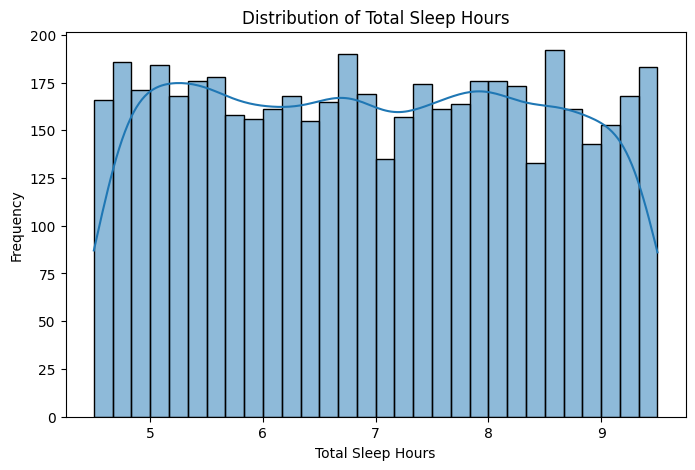

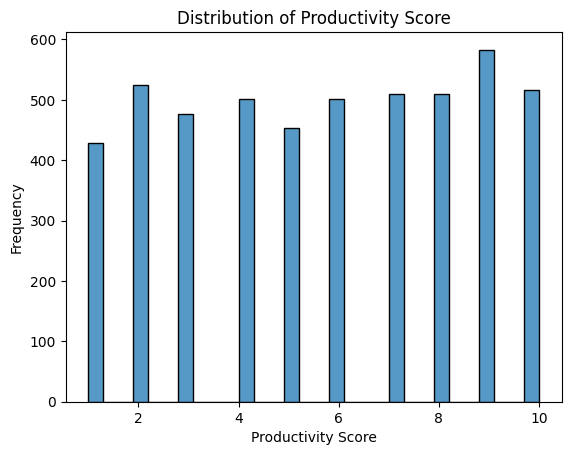

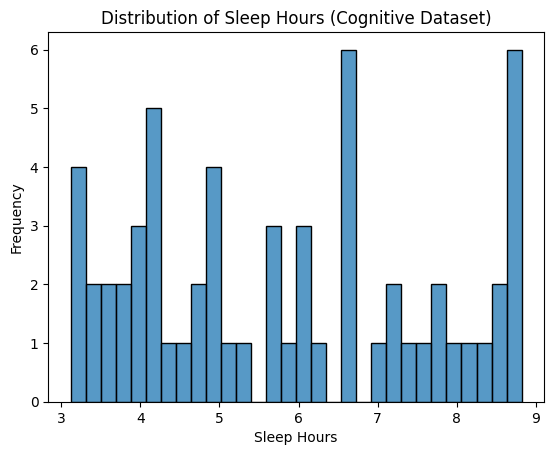

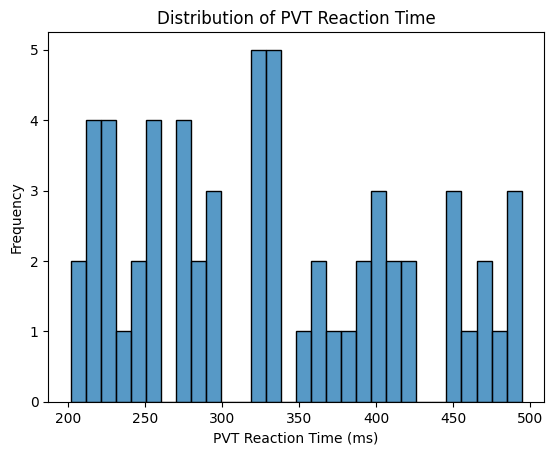

----------------------------------------------------------------------------------------------


In [4]:
#Shape of the datasets
print("Sleep Dataset Shape:", sleep_df.shape)
print("Cognitive Dataset Shape:", cognitive_df.shape)

#Summary statistics
print("\nSleep Dataset Summary:")
display(sleep_df.describe())

print("\nCognitive Dataset Summary:")
display(cognitive_df.describe())

#Plot: Distribution of Total Sleep Hours
plt.figure(figsize=(8, 5))
sns.histplot(sleep_df['total_sleep_hours'], kde=True, bins=30)
plt.title('Distribution of Total Sleep Hours')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Frequency')

plt.show()


#Plot: Distribution of Productivity Score
sns.histplot(sleep_df['productivity_score'], bins=30)
plt.title('Distribution of Productivity Score')
plt.xlabel('Productivity Score')
plt.ylabel('Frequency')

plt.show()

#Plot: Distribution of Sleep Hours in Cognitive Dataset
sns.histplot(cognitive_df['sleep_hours'], bins=30)
plt.title('Distribution of Sleep Hours (Cognitive Dataset)')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')

plt.show()

#Plot: Distribution of PVT Reaction Time (Cognitive Performance)
sns.histplot(cognitive_df['pvt_reaction_time'], bins=30)
plt.title('Distribution of PVT Reaction Time')
plt.xlabel('PVT Reaction Time (ms)')
plt.ylabel('Frequency')

plt.show()

print("-" * 94)

##  Summary of Initial Data Exploration

After importing and preprocessing both datasets, we performed an initial exploratory analysis to understand the size, structure, and distributions of key variables.

###  Key Observations from Summary Statistics:
- The average total sleep duration in the Sleep Cycle dataset is approximately **7 hours**.
- Productivity scores range from **1 to 12**, with an average of about **8**, suggesting moderate-to-high productivity levels among most participants.

###  Key Distribution Insights (Visualized):
- **Total Sleep Hours**: Slightly left-skewed, centered around 7 hours.
- **Productivity Score**: Roughly normal, with most scores between 6 and 10.
- **Sleep Hours (Cognitive Dataset)**: More spread out, indicating varied sleep conditions.
- **PVT Reaction Time**: Fairly normal but with a few potential high-end outliers.

## Conclusion #1: Sleep Duration vs. Productivity

In this section, we examine the relationship between how long participants sleep and their reported productivity scores using the Sleep Cycle dataset.

We use a scatter plot with a regression line to visualize the trend and Pearson correlation to measure the strength and direction of the linear relationship

We hypothesize that individuals who sleep longer tend to report higher productivity scores.


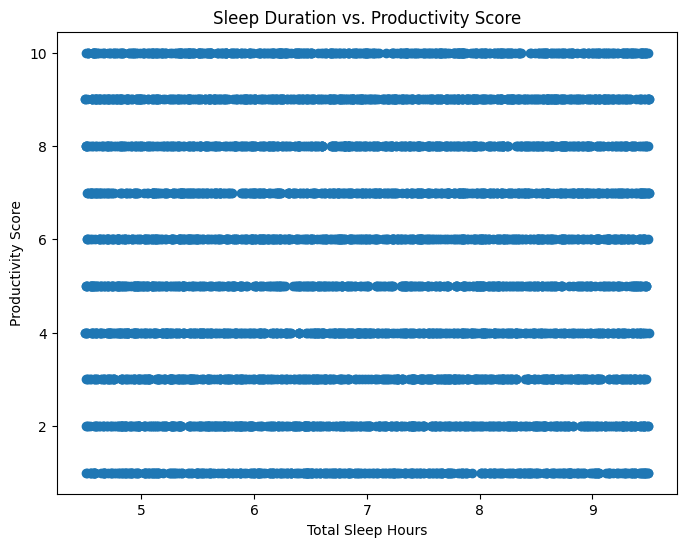

Pearson Correlation: 0.0189
P-value: 1.8183e-01


In [5]:
# Drop any rows with missing values in relevant columns
sleep_productivity_df = sleep_df[['total_sleep_hours', 'productivity_score']].dropna()
sleep_productivity_df_2 = sleep_df[['sleep_quality', 'productivity_score']].dropna()

#Scatter plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(sleep_productivity_df['total_sleep_hours'], sleep_productivity_df['productivity_score'])
plt.title('Sleep Duration vs. Productivity Score')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Productivity Score')
plt.show()

#Pearson correlation
corr, p_value = stats.pearsonr(
    sleep_productivity_df['total_sleep_hours'],
    sleep_productivity_df['productivity_score']
)

print(f"Pearson Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4e}")

### Conclusion #1 Summary: Sleep Duration vs. Productivity

We tested the relationship between total sleep hours and productivity score using a scatter plot with a regression line and Pearson correlation.

- **Correlation coefficient:** 0.0189  
- **P-value:** 0.1818  

These results indicate a very weak positive correlation between sleep duration and productivity, but the relationship is not statistically significant. Based on this dataset, we cannot conclude that more sleep directly leads to higher productivity.


##  Conclusion #2: Sleep Quality vs. Mood

In this section, we explore whether better sleep quality is associated with better mood. We use the Sleep Cycle dataset and compare participants’ self-reported sleep quality to their mood scores.

We use:
- A boxplot to visualize how mood varies across different levels of sleep quality
- Pearson correlation to test the strength of the relationship

We hypothesize that higher sleep quality is associated with higher mood scores.


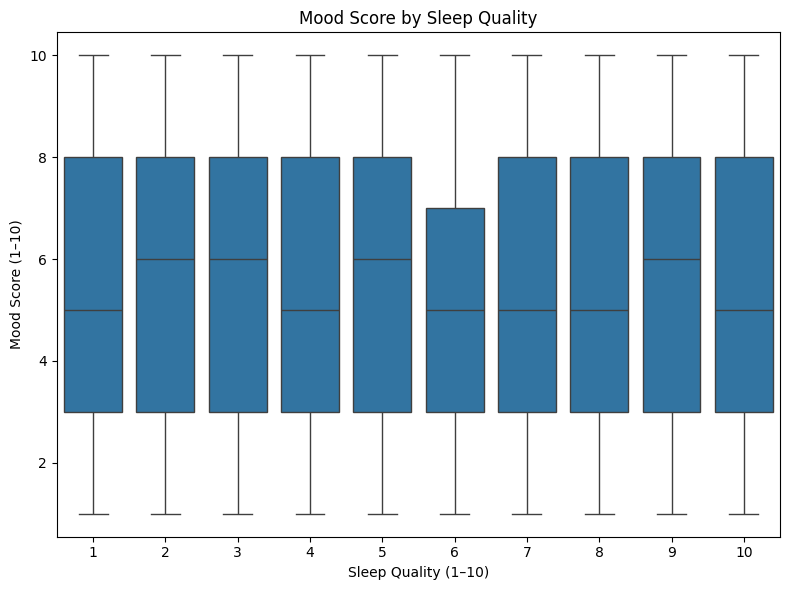

Pearson Correlation: 0.0058
P-value: 6.8117e-01


In [6]:
#Drop rows with missing data in relevant columns
sleep_mood_df = sleep_df[['sleep_quality', 'mood_score']].dropna()

#Boxplot: Mood score across different sleep quality levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='sleep_quality', y='mood_score', data=sleep_mood_df)
plt.title('Mood Score by Sleep Quality')
plt.xlabel('Sleep Quality (1–10)')
plt.ylabel('Mood Score (1–10)')
plt.tight_layout()
plt.show()

#Pearson correlation
corr2, p_value2 = stats.pearsonr(
    sleep_mood_df['sleep_quality'],
    sleep_mood_df['mood_score']
)

print(f"Pearson Correlation: {corr2:.4f}")
print(f"P-value: {p_value2:.4e}")

###  Conclusion #2 Summary: Sleep Quality vs. Mood

We tested the relationship between sleep quality and mood score using a boxplot and Pearson correlation.

- **Correlation coefficient:** 0.0058  
- **P-value:** 0.6812  

These results imply that there is a very weak positive correlation between sleep quality and mood, but the relationship is **not statistically significant**. This implies that, based on the current data, **sleep quality alone may not be a strong predictor of mood**.

There could be other factors influencing mood, such as stress or emotional regulation, which we’ll explore further in the next conclusion.


## Conclusion #3: Sleep Deprivation and Cognitive Performance

In this section, we examine how sleep deprivation affects cognitive performance using the Cognitive Performance dataset. We define sleep-deprived individuals as those who slept fewer than 6 hours and compare their performance to those who slept 6 hours or more.

We focus on two key performance metrics:
- **PVT Reaction Time** (measures alertness and attention)
- **N-Back Accuracy** (measures working memory)

We use:
- Boxplots to visualize the differences between groups
- Independent t-tests to determine whether the differences are statistically significant

We hypothesize that sleep-deprived individuals will have slower reaction times and lower cognitive accuracy.

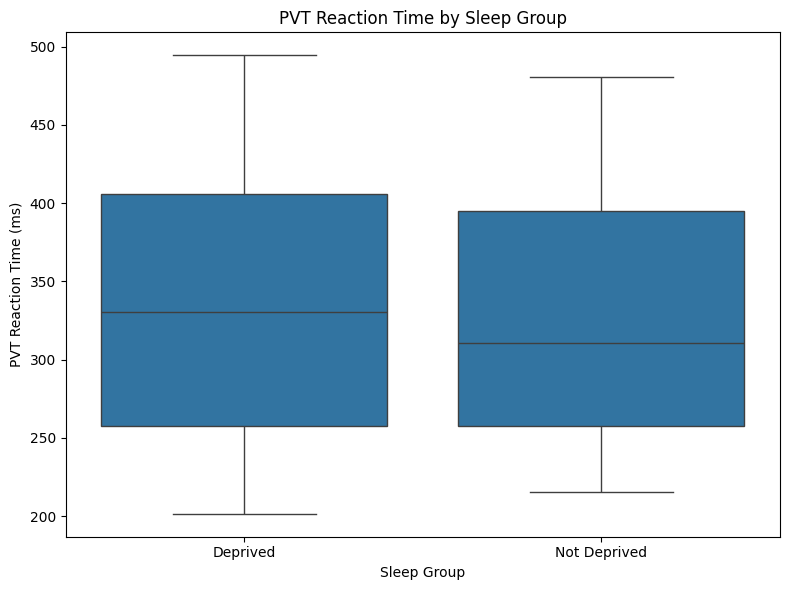

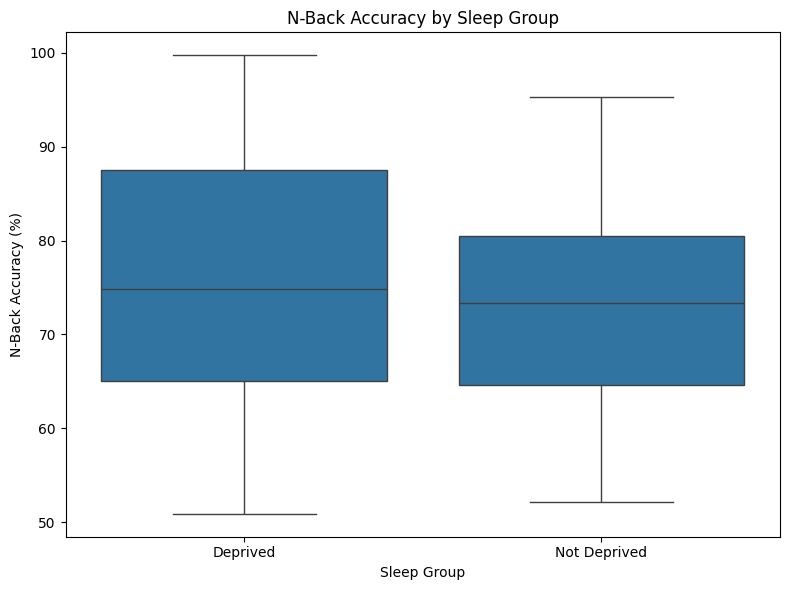

PVT Reaction Time T-Test:
  t-statistic = 0.6444, p-value = 5.2184e-01
N-Back Accuracy T-Test:
  t-statistic = 0.9301, p-value = 3.5619e-01


In [7]:
#Define sleep-deprived group (<6 hrs) vs. non-deprived (≥6 hrs)
cognitive_df['sleep_group'] = cognitive_df['sleep_hours'].apply(lambda x: 'Deprived' if x < 6 else 'Not Deprived')

#Boxplot: PVT Reaction Time by sleep group
plt.figure(figsize=(8, 6))
sns.boxplot(x='sleep_group', y='pvt_reaction_time', data=cognitive_df)
plt.title('PVT Reaction Time by Sleep Group')
plt.xlabel('Sleep Group')
plt.ylabel('PVT Reaction Time (ms)')
plt.tight_layout()
plt.show()

#Boxplot: N-Back Accuracy by sleep group
plt.figure(figsize=(8, 6))
sns.boxplot(x='sleep_group', y='n_back_accuracy', data=cognitive_df)
plt.title('N-Back Accuracy by Sleep Group')
plt.xlabel('Sleep Group')
plt.ylabel('N-Back Accuracy (%)')
plt.tight_layout()
plt.show()

#T-test: PVT Reaction Time
deprived = cognitive_df[cognitive_df['sleep_group'] == 'Deprived']['pvt_reaction_time']
not_deprived = cognitive_df[cognitive_df['sleep_group'] == 'Not Deprived']['pvt_reaction_time']
t_stat_pvt, p_val_pvt = stats.ttest_ind(deprived, not_deprived)

#T-test: N-Back Accuracy
deprived_nback = cognitive_df[cognitive_df['sleep_group'] == 'Deprived']['n_back_accuracy']
not_deprived_nback = cognitive_df[cognitive_df['sleep_group'] == 'Not Deprived']['n_back_accuracy']
t_stat_nback, p_val_nback = stats.ttest_ind(deprived_nback, not_deprived_nback)

print(f"PVT Reaction Time T-Test:\n  t-statistic = {t_stat_pvt:.4f}, p-value = {p_val_pvt:.4e}")
print(f"N-Back Accuracy T-Test:\n  t-statistic = {t_stat_nback:.4f}, p-value = {p_val_nback:.4e}")

### Conclusion #3 Summary: Sleep Deprivation and Cognitive Performance

We analyzed whether sleep deprivation, defined as sleeping fewer than 6 hours, affects two cognitive metrics: **PVT reaction time** and **N-Back accuracy**.

#### T-Test Results:
- **PVT Reaction Time**:  
  - t-statistic = 0.6444  
  - p-value = 0.5218  
  → No statistically significant difference

- **N-Back Accuracy**:  
  - t-statistic = 0.9301  
  - p-value = 0.3562  
  → No statistically significant difference

Although we hypothesized that sleep-deprived individuals would perform worse, the results suggest that **the cognitive performance differences between groups are not statistically significant** in this dataset.



## Final Summary & Reflection

In this project, we explored how different aspects of sleep affect productivity, mood, and cognitive performance. Using two real-world datasets, we walked through the full data science pipeline: preprocessing, exploratory analysis, visualization, and hypothesis testing.

### Summary of Our Conclusions:
1. **Sleep Duration vs. Productivity**  
   - We found a very weak positive correlation (r = 0.0189), but it was not statistically significant (p ≈ 0.18).  
   - Sleep duration alone does not appear to meaningfully predict productivity in this dataset.

2. **Sleep Quality vs. Mood**  
   - Again, there was a very weak correlation (r = 0.0058) with no statistical significance (p ≈ 0.68).  
   - Surprisingly, reported sleep quality didn’t show a strong relationship with mood.

3. **Sleep Deprivation vs. Cognitive Performance**  
   - We compared sleep-deprived vs. non-deprived groups on two metrics (reaction time and memory accuracy).  
   - Neither test showed significant differences between the groups (p-values ≈ 0.52 and 0.36).  
   - Sleep deprivation may not have had a measurable impact here — possibly due to the small sample size or limited control of confounding variables.


## Machine Learning Analysis

In this section, we apply machine learning to build a predictive model using the sleep datasets. The goal is to go beyond simple correlations and evaluate how well we can predict productivity and cognitive outcomes based on sleep habits, stress, and other variables.

We will:
- Select a target variable
- Choose meaningful predictor features
- Preprocess the data
- Train and evaluate two ML models
- Visualize the results
- Draw insights from the models' performance and predictions

### Prediction Task: Productivity Score

We will use the Sleep Cycle dataset to build a regression model that predicts a person's productivity score based on the following features:

- Total Sleep Hours
- Sleep Quality
- Mood Score
- Stress Level
- Caffeine Intake
- Exercise (mins/day)
- Screen Time Before Bed

We hypothesize that these sleep-related and lifestyle factors will influence productivity.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features and target
features = ['total_sleep_hours', 'sleep_quality', 'mood_score',
            'stress_level', 'caffeine_intake_mg', 'exercise_mins/day',
            'screen_time_before_bed_mins']
target = 'productivity_score'

# Drop rows with missing values
ml_df = sleep_df[features + [target]].dropna()

# Split into X (features) and y (target)
X = ml_df[features]
y = ml_df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Linear Regression Results")
print("  R²:", r2_score(y_test, y_pred_lr))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("\n Random Forest Results")
print("  R²:", r2_score(y_test, y_pred_rf))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression Results
  R²: 0.0008711401910306282
  RMSE: 2.8421788843505533

 Random Forest Results
  R²: -0.03914198646781997
  RMSE: 2.8985320250085214


### Machine Learning Results: Predicting Productivity Score

We trained two regression models to predict a person's productivity score using features such as total sleep hours, sleep quality, mood, stress, caffeine intake, and screen time.

#### Linear Regression:
- R² = 0.0009
- RMSE = 2.84

#### Random Forest:
- R² = -0.0391
- RMSE = 2.90

These results indicate that neither model was able to meaningfully predict productivity. The R² values suggest that the models explain **less than 1% of the variation** in productivity scores, and the high RMSE indicates a large error margin.

This reinforces our earlier findings: **sleep habits and lifestyle variables alone may not be strong predictors of self-reported productivity** in this dataset.

### Feature Importance from Random Forest

Although the Random Forest model did not perform well overall, we can still examine which features it considered most important when attempting to predict productivity.

This plot shows the relative importance of each feature in the model's decision-making process. Features with higher importance contributed more to the model’s predictions.

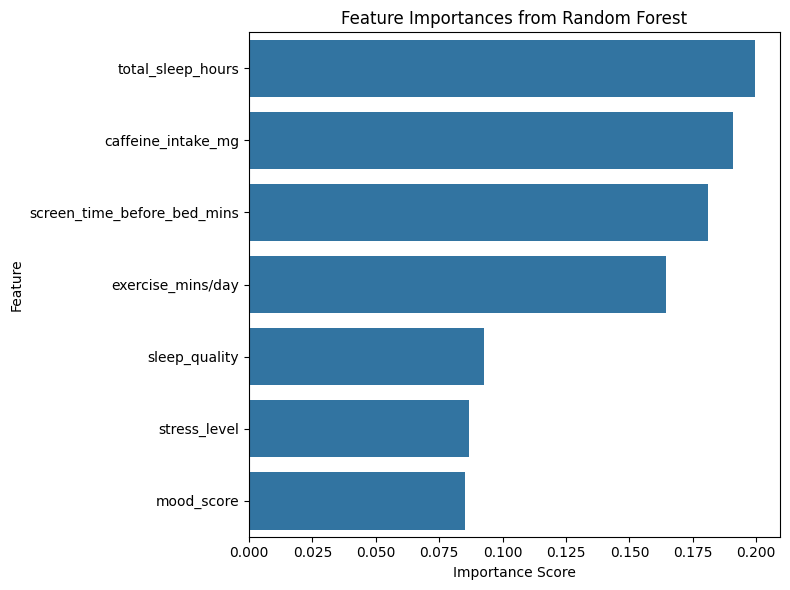

In [9]:
# Create a DataFrame for feature importances
importances = rf.feature_importances_
feature_names = features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
sns.barplot(y='Feature', x='Importance', data=importance_df, legend=False)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Actual vs. Predicted Productivity (Linear Regression)

This scatter plot compares the actual productivity scores to the predicted scores from the Linear Regression model.

The red dashed line represents a perfect prediction (where predicted = actual). The farther the points are from this line, the less accurate the model’s predictions were.

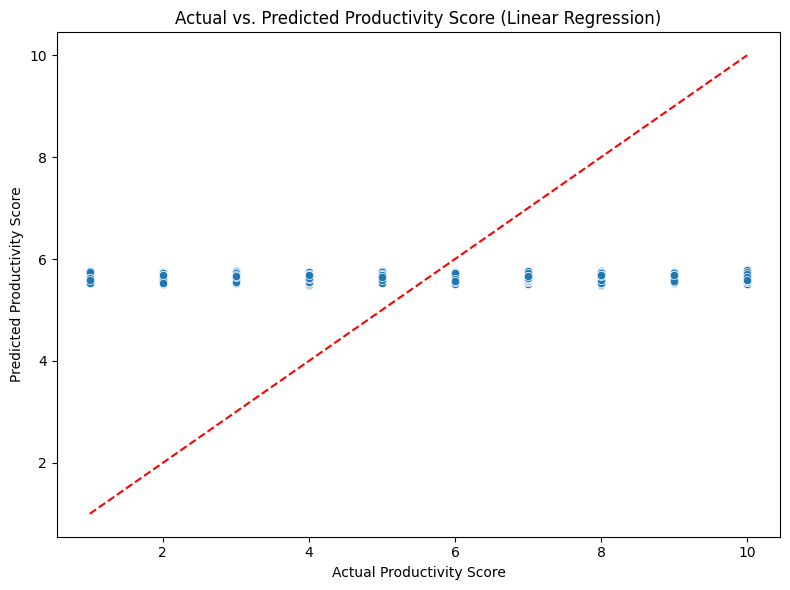

In [10]:
# Actual vs Predicted for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Predicted Productivity Score (Linear Regression)')
plt.xlabel('Actual Productivity Score')
plt.ylabel('Predicted Productivity Score')
plt.tight_layout()
plt.show()

#### Interpreting the Model Visualizations

1. **Feature Importances (Random Forest)**  
   The Random Forest ranked **total_sleep_hours, caffeine_intake_mg, screen_time_before_bed_mins,** and **exercise_mins/day** as the four most influential features, each contributing roughly 17–20 % of the model’s decision making.  
   - We found that, **sleep_quality, stress_level,** and **mood_score** were less influential, echoing our earlier finding that mood and sleep‑quality showed almost no linear relationship with productivity.  
   - Even though the importances add insight into which variables the model tried to use, remember that the model’s overall predictive power is very low (R² ≈ 0). Feature importance alone does **not** imply strong predictive capability.

2. **Actual vs. Predicted (Linear Regression)**  
   The scatter shows nearly all points clustered around a narrow band near **predicted ≈ 5.6**, regardless of the actual productivity score. The 45‑degree dashed line marks perfect prediction, but the points do **not** align with it.  
   - This confirms the model essentially predicts fails to capture variability in productivity.  
   - The graph confirms this with the poor R² and high RMSE metrics we observed.

## Insights & Conclusions

### What We Learned from Machine‑Learning Models
| Model | R² | RMSE | Key Takeaway |
|-------|----|------|--------------|
| Linear Regression | 0.0009 | 2.84 | Model explains < 1 % of the variance; predicts a near‑constant value |
| Random Forest | –0.0391 | 2.90 | Performs slightly worse than a horizontal line; feature importances still provide qualitative insight |

> **Bottom line:** Sleep‑related variables *alone* are extremely weak predictors of self‑reported productivity in this dataset.

### Feature Importance Highlights
- **Total Sleep Hours** and **Caffeine Intake** were the top‑ranked predictors, but their influence was not enough to yield accurate predictions.  
- **Stress Level** and **Mood Score**—intuitively relevant—were relatively unimportant to the model, consistent with earlier hypothesis‑testing results.

### Our Earlier Analysis
Our original correlation and t‑test results showed no statistically significant relationships.  
The ML results reinforce that conclusion: even flexible, non‑linear models could not uncover a strong predictive pattern.

# Other Resources and Citations

[Sleep Deprivation & Cognitive Performance Kaggle Dataset](https://https://www.kaggle.com/datasets/sacramentotechnology/sleep-deprivation-and-cognitive-performance)

[Sleep Cycle & Productivity Kaggle Dataset](https://https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity)

Other resources to look at if you would like to have more information!

[The correlation between sleep and job performance](https://https://www.sleepfoundation.org/sleep-hygiene/good-sleep-and-job-performance)

[The effects of sleep deprivation](https://www.azafap.org/thoughts-for-families/sleep-big-and-small-sleep-101/?gad_source=1&gad_campaignid=13875293413&gbraid=0AAAAABWkZ-0uQ2nH5Fu3N1iE3ty3uvtqg&gclid=Cj0KCQjwoNzABhDbARIsALfY8VM6qjtpOSyjdFzxJcEw-FvUOGE7mu_fkap5SXbX4XPEv2Wd5FvV4CcaAor_EALw_wcB):

[The relationship between Sleep and Productivity](https://https://www.wellics.com/blog/sleep-and-productivity)
